# **Forest Fire Detection Using Convolutional Neural Network**

---



In this notebook let's see how we can differentiate between an image that shows forest with fire from an image of forrest without fire. To do this I've used CNN.

link to dataset: https://www.kaggle.com/datasets/brsdincer/wildfire-detection-image-data

Importing necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

2022-07-09 16:21:49.923088: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-07-09 16:21:49.923243: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Making saperate datasets for training and testing

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("../input/wildfire-detection-image-data/forest_fire/Training and Validation/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("../input/wildfire-detection-image-data/forest_fire/Testing/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

Model Building

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

2022-07-09 16:22:19.262672: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-09 16:22:19.266054: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-07-09 16:22:19.266102: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-09 16:22:19.266142: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (1a16cd567f7f): /proc/driver/nvidia/version does not exist
2022-07-09 16:22:19.267424: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

Compiling the model

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Fitting the model

In [6]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

2022-07-09 16:22:33.006344: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-09 16:22:33.011735: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/10
58/58 [==============================] - 50s 835ms/step - loss: 0.3663 - accuracy: 0.8421 - val_loss: 0.2695 - val_accuracy: 0.8971
Epoch 2/10
58/58 [==============================] - 47s 803ms/step - loss: 0.1848 - accuracy: 0.9340 - val_loss: 0.2758 - val_accuracy: 0.8971
Epoch 3/10
58/58 [==============================] - 47s 808ms/step - loss: 0.1507 - accuracy: 0.9500 - val_loss: 0.2906 - val_accuracy: 0.8529
Epoch 4/10
58/58 [==============================] - 46s 796ms/step - loss: 0.1177 - accuracy: 0.9601 - val_loss: 0.2548 - val_accuracy: 0.9265
Epoch 5/10
58/58 [==============================] - 46s 800ms/step - loss: 0.1275 - accuracy: 0.9648 - val_loss: 0.1768 - val_accuracy: 0.9118
Epoch 6/10
58/58 [==============================] - 47s 804ms/step - loss: 0.0779 - accuracy: 0.9758 - val_loss: 0.1412 - val_accuracy: 0.8971
Epoch 7/10
58/58 [==============================] - 57s 990ms/step - loss: 0.0692 - accuracy: 0.9756 - val_loss: 0.2959 - val_accuracy: 0.9118

Predicting on Test Dataset

In [7]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

In [8]:
predictions

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [9]:
print(len(predictions))

68


Plotting loss per iteration

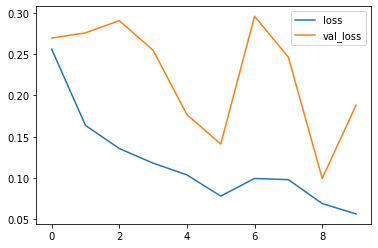

In [10]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Plotting accuracy per iteration

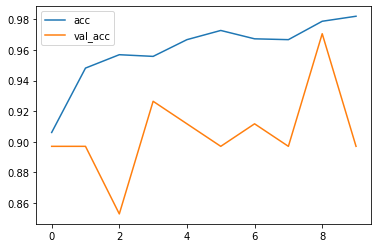

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Making a function to see any image from dataset with predicted label

In [12]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

[[0.]]


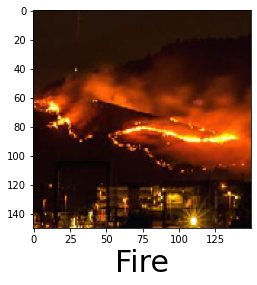

In [13]:
predictImage("../input/wildfire-detection-image-data/forest_fire/Testing/fire/abc182.jpg")

[[0.]]


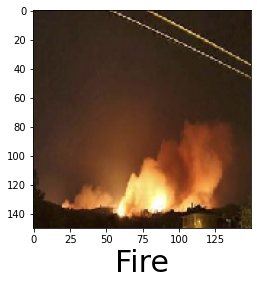

In [14]:
predictImage('../input/wildfire-detection-image-data/forest_fire/Testing/fire/abc190.jpg')

[[1.]]


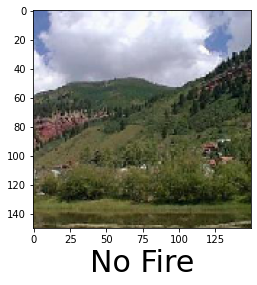

In [15]:
predictImage('../input/wildfire-detection-image-data/forest_fire/Testing/nofire/abc346.jpg')

[[1.]]


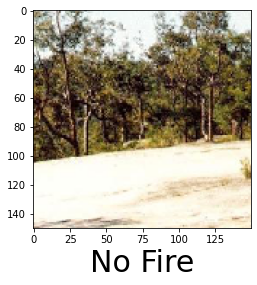

In [16]:
predictImage('../input/wildfire-detection-image-data/forest_fire/Testing/nofire/abc361.jpg')

[[0.]]


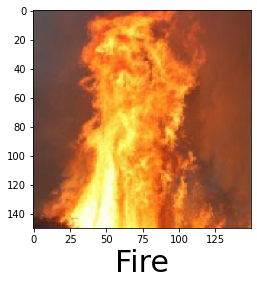

In [17]:
predictImage('../input/wildfire-detection-image-data/forest_fire/Training and Validation/fire/abc011.jpg')

[[0.]]


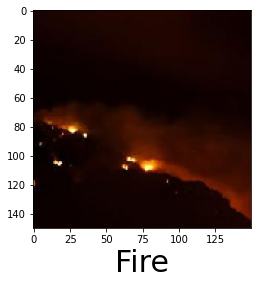

In [18]:
predictImage('../input/wildfire-detection-image-data/forest_fire/Testing/fire/abc172.jpg')

[[0.]]


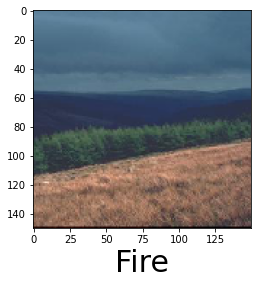

In [19]:
predictImage('../input/wildfire-detection-image-data/forest_fire/Testing/nofire/abc341.jpg')



-----



# Final Thoughts



1.   Model is well performing in testing.
2.   The model can be improved further more as the graphs showing accuracy and loss are bit messy.
3.   Transfer Learning can be used to reduce the learning/training time significantly.







---

